In [95]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

%matplotlib inline
plt.rcParams['font.size'] = '16'

from collections import Counter
from nltk.corpus import stopwords


In [124]:
eng_stopwords = set(stopwords.words('english')) 
eng_stopwords.add("amp")
eng_stopwords.add("eng")

In [3]:
train_df = pd.read_csv('Keyword Analysis-vintage beads-.csv')
train_df.shape

(52, 6)

In [24]:
df = train_df.iloc[2:]
df = df.reset_index()
df = df.drop(['index','Enter the Term'],axis = 1)
df.columns = ['up time','channelId','title','description','youtuber']
df.head(5)

,up time,channelId,title,description,youtuber
0,2021-09-13T18:43:20Z,UCSvzb90XLo2f-j7sfwQsrYA,UNBOXING Rare Vintage BEADS &amp; CHARMS! (80s...,FOLLOW MY TIK TOK: https://www.tiktok.com/@gra...,banana peppers
1,2019-07-12T02:23:36Z,UCeZvO_PIyGoqPl_EHiUEhaA,Beads: the Ancient International Currency,"Often overlooked, ancient beads are abundantly...",Kasaysayan Hunters
2,2020-12-25T16:12:16Z,UCPUqBevT81GAuuCqpqpXROg,Vintage Necklace Haul Vintage beads Japan,Some of my favorite vintage bead necklaces. th...,Vintage Discoveries
3,2015-05-08T15:05:36Z,UC_bUcF0Vda0W0K6Ek7ygorw,Show and Tell: Vintage Beads,http://www.beadaholique.com/beads-pendants-cha...,Beadaholique
4,2020-09-20T17:42:16Z,UCcjrCFCAZJUkYURMtxwpvmA,Making beautiful beads from antique glass! Rec...,Join us on our bead-making adventure to find a...,Northern Mudlarks


In [112]:
def titles_to_word_sets(titles_series):
    # cleanup characters
    titles_words = titles_series.str.lower().replace(r'[^a-z ]+','', regex=True).unique()
    
    # create list of sets of word for each dataset label
    titles_words = [set(t_words.split()) for t_words in titles_words]
    # remove stopwords
    titles_words = [t_words.difference(eng_stopwords) for t_words in titles_words]
    return titles_words

def count_occurences (list_of_word_sets):
    cnt = Counter ([w for word_set in list_of_word_sets for w in word_set])
    return {k: v for k, v in sorted(cnt.items(), key=lambda item: item[1], reverse=True)}

titles_words = titles_to_word_sets(df.title)
occurencies = count_occurences(titles_words)

counts1 = list(occurencies.items())[:15]

In [104]:
c1 = pd.DataFrame(counts1)
c1.columns = ['word','count']

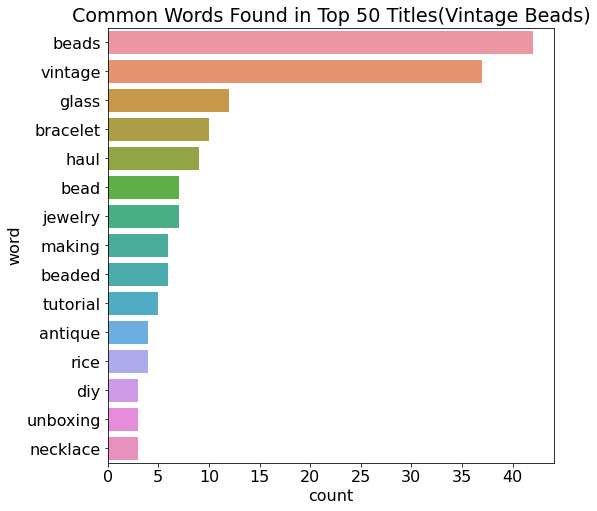

In [109]:

fig, ax = plt.subplots(figsize=(8, 8))
ax =sns.barplot(x='count',y='word',data=c1)
ax.set_title("Common Words Found in Top 50 Titles(Vintage Beads)")
plt.show()

In [19]:
def find_coverage_words(words_sets, min_occurencies=3):
    """ finds a few words that covers most word sets provided
    set min_occurencies to 1 to cover all words set.
    returns dict with covering words and number of words_sets excluded at iteration 
    """
    coverage_words = {}
    while len(words_sets) > 0:
        occur_dict = count_occurences(words_sets)
        next_word, next_word_count = list(occur_dict.items())[0]
        if next_word_count < min_occurencies:
            break
        words_sets = [word_set for word_set in words_sets if next_word not in word_set]
        coverage_words[next_word] = next_word_count
    coverage_words['_REMAINING_'] = len(words_sets)
    return coverage_words, len(words_sets)

coverage_words, n_remaining = find_coverage_words(titles_words)
print(f"Analyzing words from {len(titles_words)} titles; found {len(coverage_words)} words")
coverage_words

Analyzing words from 50 titles; found 3 words


{'beads': 42, 'vintage': 7, '_REMAINING_': 1}

In [20]:
craft_df = pd.read_csv('Keyword Analysis-beads craft-.csv')
craft_df.shape

(52, 6)

In [23]:
crdf = craft_df.iloc[2:]
crdf = crdf.reset_index()
crdf = crdf.drop(['index','Enter the Term'], axis = 1)
crdf.columns = ['up time','channelId','title','description','youtuber']
crdf.head(5)

,up time,channelId,title,description,youtuber
0,2019-07-28T10:00:00Z,UCbP0hjFiW9CEnL9HpSPbK_Q,5 Brilliant Craft Ideas From beads | Home Deco...,5 DIY Ideas From beads | Home Decor | Artkala ...,Artkala
1,2019-07-20T10:45:36Z,UCnEpMhGQ1O_2-JK8w2FaSYQ,5 ИДЕЙ поделок ИЗ БИСЕРА своими руками,В этом видео я собрала для Вас 5 мастер-классо...,DIANA Bilohorka
2,2014-07-20T08:00:03Z,UC8B2IELLIDNH7ki7ke6tXow,DIY: Cute Daisy Chain Bracelet ¦ The Corner of...,Learn how to make this cute and simple daisy c...,The Corner of Craft
3,2020-11-25T01:00:06Z,UCCNlEU60bIEYB-o3v8y2HDQ,How to make Mask Holder | Beaded Jewelry | Bea...,Hi ! This video is how to make a beaded mask h...,pureag
4,2019-03-05T16:15:19Z,UCk4Oqj6ZaAezWsSU76bzBLA,DIY 7 Beautiful beads designs/ Easy Beaded cr...,1 - Beads star . Link https://youtu.be/o2_TJq6...,Homemade Creations - HMC - by Vandana Hegde


In [27]:
Ctitles_words = titles_to_word_sets(crdf.title)
Coccurencies = count_occurences(Ctitles_words)
print("Top 10 words by frequency:")
list(Coccurencies.items())[:20]

Top 10 words by frequency:


[('craft', 36),
 ('beads', 34),
 ('diy', 16),
 ('make', 16),
 ('beaded', 12),
 ('ideas', 11),
 ('bead', 10),
 ('easy', 9),
 ('crafts', 7),
 ('tutorial', 5),
 ('home', 4),
 ('making', 4),
 ('flower', 4),
 ('decor', 3),
 ('brilliant', 3),
 ('corner', 3),
 ('holder', 3),
 ('beautiful', 3),
 ('beginners', 3),
 ('crystal', 3)]

In [93]:
c2 = pd.DataFrame(list(Coccurencies.items())[:15],columns = ['word','count'])

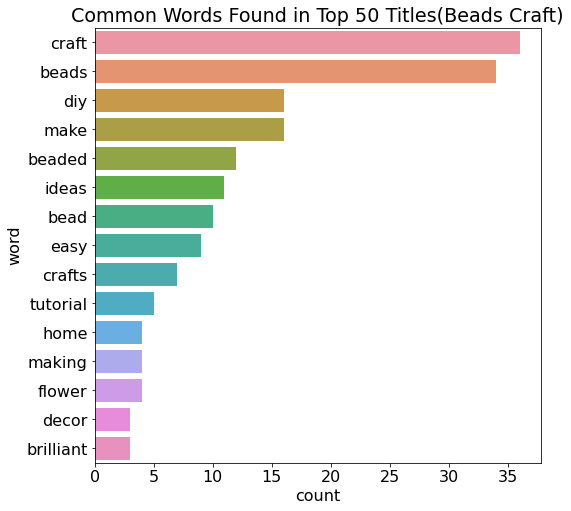

In [92]:
fig, ax = plt.subplots(figsize=(8, 8))
ax =sns.barplot(x='count',y='word',data=c2)
ax.set_title("Common Words Found in Top 50 Titles(Beads Craft)")
plt.show()

## Beads Bracelet Top 50 Titles Analysis

In [113]:
bradf = pd.read_csv('Keyword Analysis -beads bracelet.csv')

bradf = bradf.iloc[2:]
bradf = bradf.reset_index()
bradf = bradf.drop(['index','Enter the Term'],axis = 1)
bradf.columns = ['up time','channelId','title','description','youtuber']
bradf.head(5)

,up time,channelId,title,description,youtuber
0,2020-07-08T05:07:46Z,UCAEOyXNpGx4QSn0r74OzyAg,making simple bead bracelets! 🍭 | jelly record.,how to make simple bead bracelets! they are re...,jelly record.
1,2021-05-11T18:34:40Z,UCC8bEAQinubuRBTkl4PB22Q,DIY seed bead flower bracelet *EASY*,Thank you guys so much for watching this video...,Taylor Alex
2,2019-08-06T18:03:16Z,UC_bUcF0Vda0W0K6Ek7ygorw,How to Make a Simple Beaded Friendship Bracelet,https://beadaholique.com/collections/beads - I...,Beadaholique
3,2014-07-20T08:00:03Z,UC8B2IELLIDNH7ki7ke6tXow,DIY: Cute Daisy Chain Bracelet ¦ The Corner of...,Learn how to make this cute and simple daisy c...,The Corner of Craft
4,2020-01-10T05:23:40Z,UCuaLK6QCWbu-hTAxEMNQknQ,How To Make Simple Pearl Bracelet// Beads Brac...,How to make simple pearl bracelet beads bracel...,Useful & Easy


In [116]:
brawords = titles_to_word_sets(bradf.title)
bracount = count_occurences(brawords)


c3 = pd.DataFrame(list(bracount.items())[:20],columns = ['word','count'])

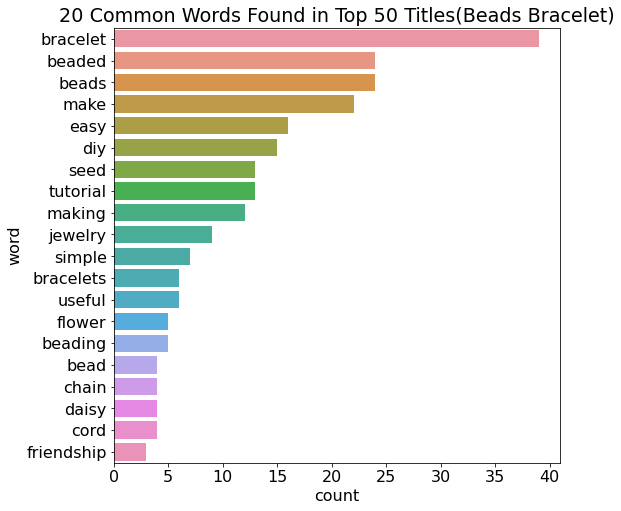

In [118]:
fig, ax = plt.subplots(figsize=(8, 8))
ax =sns.barplot(x='count',y='word',data=c3)
ax.set_title("20 Common Words Found in Top 50 Titles(Beads Bracelet)")
plt.show()

## Beads Tutorial Top 50 Titles Analysis

In [120]:
c4df = pd.read_csv('Keyword Analysis -beads tutorial.csv')

c4df = c4df.iloc[2:]
c4df = c4df.reset_index()
c4df = c4df.drop(['index','Enter the Term'],axis = 1)
c4df.columns = ['up time','channelId','title','description','youtuber']
c4df.head(5)

,up time,channelId,title,description,youtuber
0,2020-08-28T09:00:23Z,UCMkmvaTQXTCmd3fn4Gxw1Zw,[Eng] 비즈 수박 만들기 🍉 | Watermelon beads tutorial ...,한입베어물고싶은 비즈수박만들기 (/≧▽≦)/ 영상을 찍을때 쉽게 따라하실 수 있도록...,응구Eunggu
1,2012-12-04T02:14:38Z,UCayXdktyKEoJr7kQcEYXZhA,3D Beaded Turtle Ring Tutorial,Friend me on facebook and show me what you hav...,Beadifulnights
2,2021-02-21T16:30:35Z,UC1zIiKvJIi7aYl2N68pWF8g,Mutable Instruments Beads ‘texture synthesiser...,Welcome to my ULTIMATE GUIDE TO BEADS a Eurora...,DivKidVideo
3,2020-04-27T00:20:36Z,UCbwB9XJ1szItlWC-HAYY3kA,Sunflower Seed Bead Tutorial,https://youtu.be/SkD5dFzp7no : NEW VIDEO CLOSE...,Victoria Frost
4,2020-06-19T21:05:41Z,UCZ5bMNzCzLstbvZ2Ax4QEJQ,Beaded Daisy String,"Native American beaded daisy chain tutorial, b...",Lisa Yang Jewelry


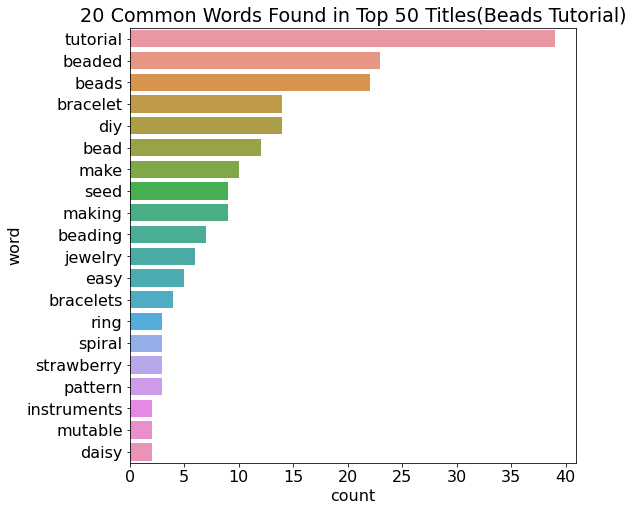

In [125]:
c4words = titles_to_word_sets(c4df.title)
c4count = count_occurences(c4words)

c4 = pd.DataFrame(list(c4count.items())[:20],columns = ['word','count'])
fig, ax = plt.subplots(figsize=(8, 8))
ax =sns.barplot(x='count',y='word',data=c4)
ax.set_title("20 Common Words Found in Top 50 Titles(Beads Tutorial)")
plt.show()